# Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Upload data

In [2]:
df = pd.read_csv('data/COVID19_state.csv')
df.head()

,State,Tested,Infected,Deaths,Population,Pop Density,Gini,ICU Beds,Income,GDP,...,Hospitals,Health Spending,Pollution,Med-Large Airports,Temperature,Urban,Age 0-25,Age 26-54,Age 55+,School Closure Date
0,Alaska,620170,17057,84,734002,1.2863,0.4081,119,59687,73205,...,21,11064,6.4,1.0,26.6,66.0,0.36,0.39,0.25,03/19/20
1,Alabama,1356420,194892,2973,4908621,96.9221,0.4847,1533,42334,45219,...,101,7281,8.1,1.0,62.8,59.0,0.33,0.37,0.31,03/16/20
2,Arkansas,1363429,113641,1985,3038999,58.4030,0.4719,732,42566,42454,...,88,7408,7.1,0.0,60.4,56.2,0.34,0.37,0.30,03/17/20
3,Arizona,1792602,248139,5982,7378494,64.9550,0.4713,1559,43650,48055,...,83,6452,9.7,1.0,60.3,89.8,0.33,0.36,0.30,03/16/20
4,California,18912501,930628,17672,39937489,256.3727,0.4899,7338,62586,74205,...,359,7549,12.8,9.0,59.4,95.0,0.33,0.40,0.26,03/19/20


In [3]:
df.columns

Index(['State', 'Tested', 'Infected', 'Deaths', 'Population', 'Pop Density',
       'Gini', 'ICU Beds', 'Income', 'GDP', 'Unemployment', 'Sex Ratio',
       'Smoking Rate', 'Flu Deaths', 'Respiratory Deaths', 'Physicians',
       'Hospitals', 'Health Spending', 'Pollution', 'Med-Large Airports',
       'Temperature', 'Urban', 'Age 0-25', 'Age 26-54', 'Age 55+',
       'School Closure Date'],
      dtype='object')

In [4]:
df_daily = pd.read_csv('data/us_states_covid19_daily.csv')
df_daily.head()

,date,state,positive,probableCases,negative,pending,totalTestResultsSource,totalTestResults,hospitalizedCurrently,hospitalizedCumulative,...,posNeg,deathIncrease,hospitalizedIncrease,hash,commercialScore,negativeRegularScore,negativeScore,positiveScore,score,grade
0,20201206,AK,35720.0,NaN,1042056.0,NaN,totalTestsViral,1077776.0,164.0,799.0,...,1077776,0,0,7b1d31e2756687bb9259b29195f1db6cdb321ea6,0,0,0,0,0,NaN
1,20201206,AL,269877.0,45962.0,1421126.0,NaN,totalTestsPeopleViral,1645041.0,1927.0,26331.0,...,1691003,12,0,19454ed8fe28fc0a7948fc0771b2f3c846c1c92e,0,0,0,0,0,NaN
2,20201206,AR,170924.0,22753.0,1614979.0,NaN,totalTestsViral,1763150.0,1076.0,9401.0,...,1785903,40,21,25fc83bffff5b32ba1a737be8e087fad9f4fde33,0,0,0,0,0,NaN
3,20201206,AS,0.0,NaN,2140.0,NaN,totalTestsViral,2140.0,NaN,NaN,...,2140,0,0,8c39eec317586b0c34fc2903e6a3891ecb00469e,0,0,0,0,0,NaN
4,20201206,AZ,364276.0,12590.0,2018813.0,NaN,totalTestsPeopleViral,2370499.0,2977.0,28248.0,...,2383089,25,242,7cf59da9e4bc31d905e179211313d08879880a85,0,0,0,0,0,NaN


In [5]:
df_daily.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

# Data Analysis
#### It is the part where we explore our data in order to find out what general trends and distributions are.

This part is aimed to answer the following questions:
- How has been the evolution on the number of cases over time?
- Do tests seem to have some effect?
- What are the subgroups that suffered most?
- If we were to do confinement measures by subgroups of populations, on which groups should we focus to stop the contagion early?

In [6]:
# State-wise COVID-19 Cases (total number of cases and also % of population - probably two separate charts)
# df dataset


In [7]:
# Total number of daily confirmed cases (line chart, df_daily)


In [8]:
# COVID-19 Testing and Positivity Rate: A line chart depicting the daily testing rate
# and the daily positivity rate over time. This chart helps assess testing adequacy and trends in infection rates.
# df_daily dataset


In [9]:
# COVID-19 Deaths by Age Group: can be used to highlight age-related risk factors
# df dataset


In [10]:
# COVID-19 Impact on Vulnerable Populations:
# Bar charts illustrating the impact of COVID-19 on vulnerable populations
# such as seniors, minorities, or low-income groups.
# df dataset


In [11]:
# COVID-19 Vaccine Coverage:
# A bar chart illustrating the percentage of the population vaccinated in each state.
# df dataset


In [12]:
# COVID-19 Demographics and Hospitalizations:
# A bar chart comparing demographic characteristics (age / gender) of COVID-19 patients and hospitalization rates.
# This chart provides insights into who is most affected.
# df dataset


In [13]:
# Distribution of daily new cases per state
# (I'd recommend using cases/100k population metric because it's a
# valid metric to compare new cases between states with deffirent population)
# this is a very good example - https://towardsdatascience.com/visualization-of-covid-19-new-cases-over-time-in-python-8c6ac4620c88


In [14]:
# Feel free to add anything else or remove something, these are just some ideas I came up with


# Model

This part contains a simultion of a simple model of contagion.

There is a total population of 1000 people. Each one can infect 3 other individuals per day with a probability of 0.05 (let's assume that they are totally independent). There are 10 persons initially infected.

- Simulate and plot the number of infected persons in the next 3 days.


After 3 days the people infected were around: 15, with the following distribution: 


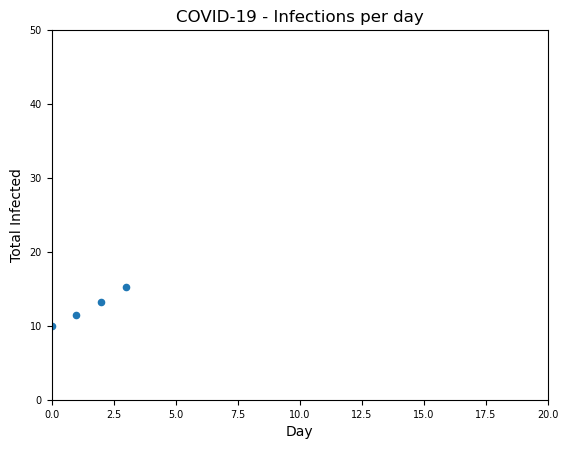

In [15]:
# How many people were infected after 3 days?
total_byday = 10
infected = [10]
day = [0]
for i in range (3):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i+1)
data = [day, infected]
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,50)
plt.xlim(0,20)
print(f"After 3 days the people infected were around: {round(total_byday)}, with the following distribution: ")
plt.show()




- How many days will it take for the full population to be infected?

The total population was infected in: 33 days
The distribution of the infection of the total population would be the following:


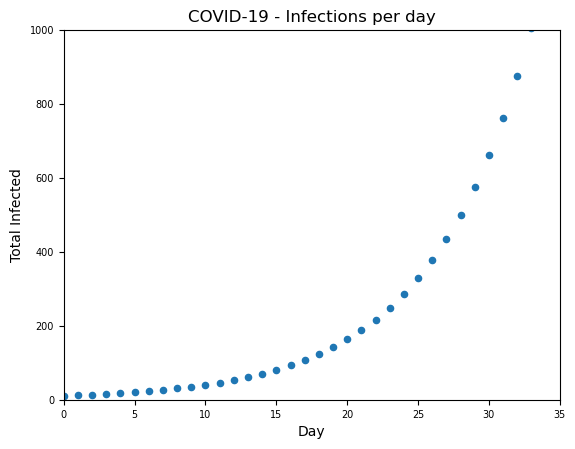

In [16]:
# How many days will it take for the full population to be infected?
i = 4
while (total_byday <= 1000):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"The total population was infected in: {day[-1]} days")
print("The distribution of the infection of the total population would be the following:")
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,1000)
plt.xlim(0,35)
plt.show()


Let's simulate a policy.

Suposse we introduce vaccination at period 3. The implications of the vaccine are only for those that are still uninfected. For simplicity, their inmunity is modeled as a reduction in the probability that they get infected of 0.01 pp. 
- How many infections result in the 10th day?

If a vaccine was introduced at day 3, after 10 days the total population infected will be about: 19 people
The total population was infected in: 145 days
The distribution of the infection of the total population would be the following:


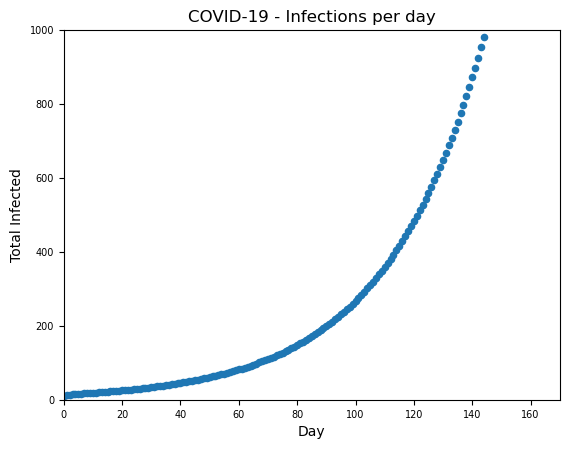

In [20]:
# How many infections will there be in the 10th day if a vaccine was introduced at day 3?
total_byday = 10
infected = [10]
day = [0]
for i in range (3):
    total_byday += total_byday*0.05*3
    infected.append(total_byday)
    day.append(i+1)
# Then vaccine was introduced
i = 4
while (i <= 10):
    total_byday += total_byday*0.01*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"If a vaccine was introduced at day 3, after 10 days the total population infected will be about: {round(infected[-1])} people")
while(total_byday<= 1000):
    total_byday += total_byday*0.01*3
    infected.append(total_byday)
    day.append(i)
    i+=1
print(f"The total population was infected in: {day[-1]} days")
print("The distribution of the infection of the total population would be the following:")
column_names = ['Day', 'Total Infected']
data = pd.DataFrame(list(zip(day, infected)),  columns=column_names)
data.plot(x='Day', y='Total Infected', kind='scatter', fontsize= 7)
plt.xlabel('Day')
plt.ylabel('Total Infected')
plt.title('COVID-19 - Infections per day')
plt.ylim(0,1000)
plt.xlim(0,170)
plt.show()